In [1]:
%load_ext wurlitzer
import numpy as np
import glob
import os
import matplotlib.pyplot as plt
from astropy.io import fits
from xspec import *
plt.rcParams['figure.figsize'] = [9,6]

Fit.statMethod = "cstat"
Fit.nIterations = 100000
Fit.delta = 1e-4
Fit.criticalDelta = 1e-4

In [2]:
#spec_file = sorted(glob.glob("*grpspec.fits"))
#spec = Spectrum(spec_file[0])

spec = Spectrum(glob.glob("*cash.fits")[0],backFile=glob.glob("*spec_bkg.fits")[0],respFile=glob.glob("*rmf")[0],arfFile=glob.glob("*.arf")[0])



1 spectrum  in use
 
Spectral Data File: 0886110301_M251spec_cash.fits  Spectrum 1
Net count rate (cts/s) for Spectrum:1  2.543e-03 +/- 4.608e-04 (61.2 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-153
  Telescope: XMM Instrument: EMOS2  Channel Type: PI
  Exposure Time: 2.144e+04 sec
 Using fit statistic: cstat
 Using Background File                0886110301_M251spec_bkg.fits
  Background Exposure Time: 2.144e+04 sec
 No response loaded.

***Warning!  One or more spectra are missing responses,
               and are not suitable for fit.
Net count rate (cts/s) for Spectrum:1  2.543e-03 +/- 4.608e-04 (61.2 % total)
***Warning!  One or more spectra are missing responses,
               and are not suitable for fit.
***Warning: Detected response matrix energy bin value = 0 (or neg).
     XSPEC will instead use small finite value (response file will not be altered).
Response successfully loaded.
Arf successfully loaded.
Spectrum 1  Spectral Data File: 088611

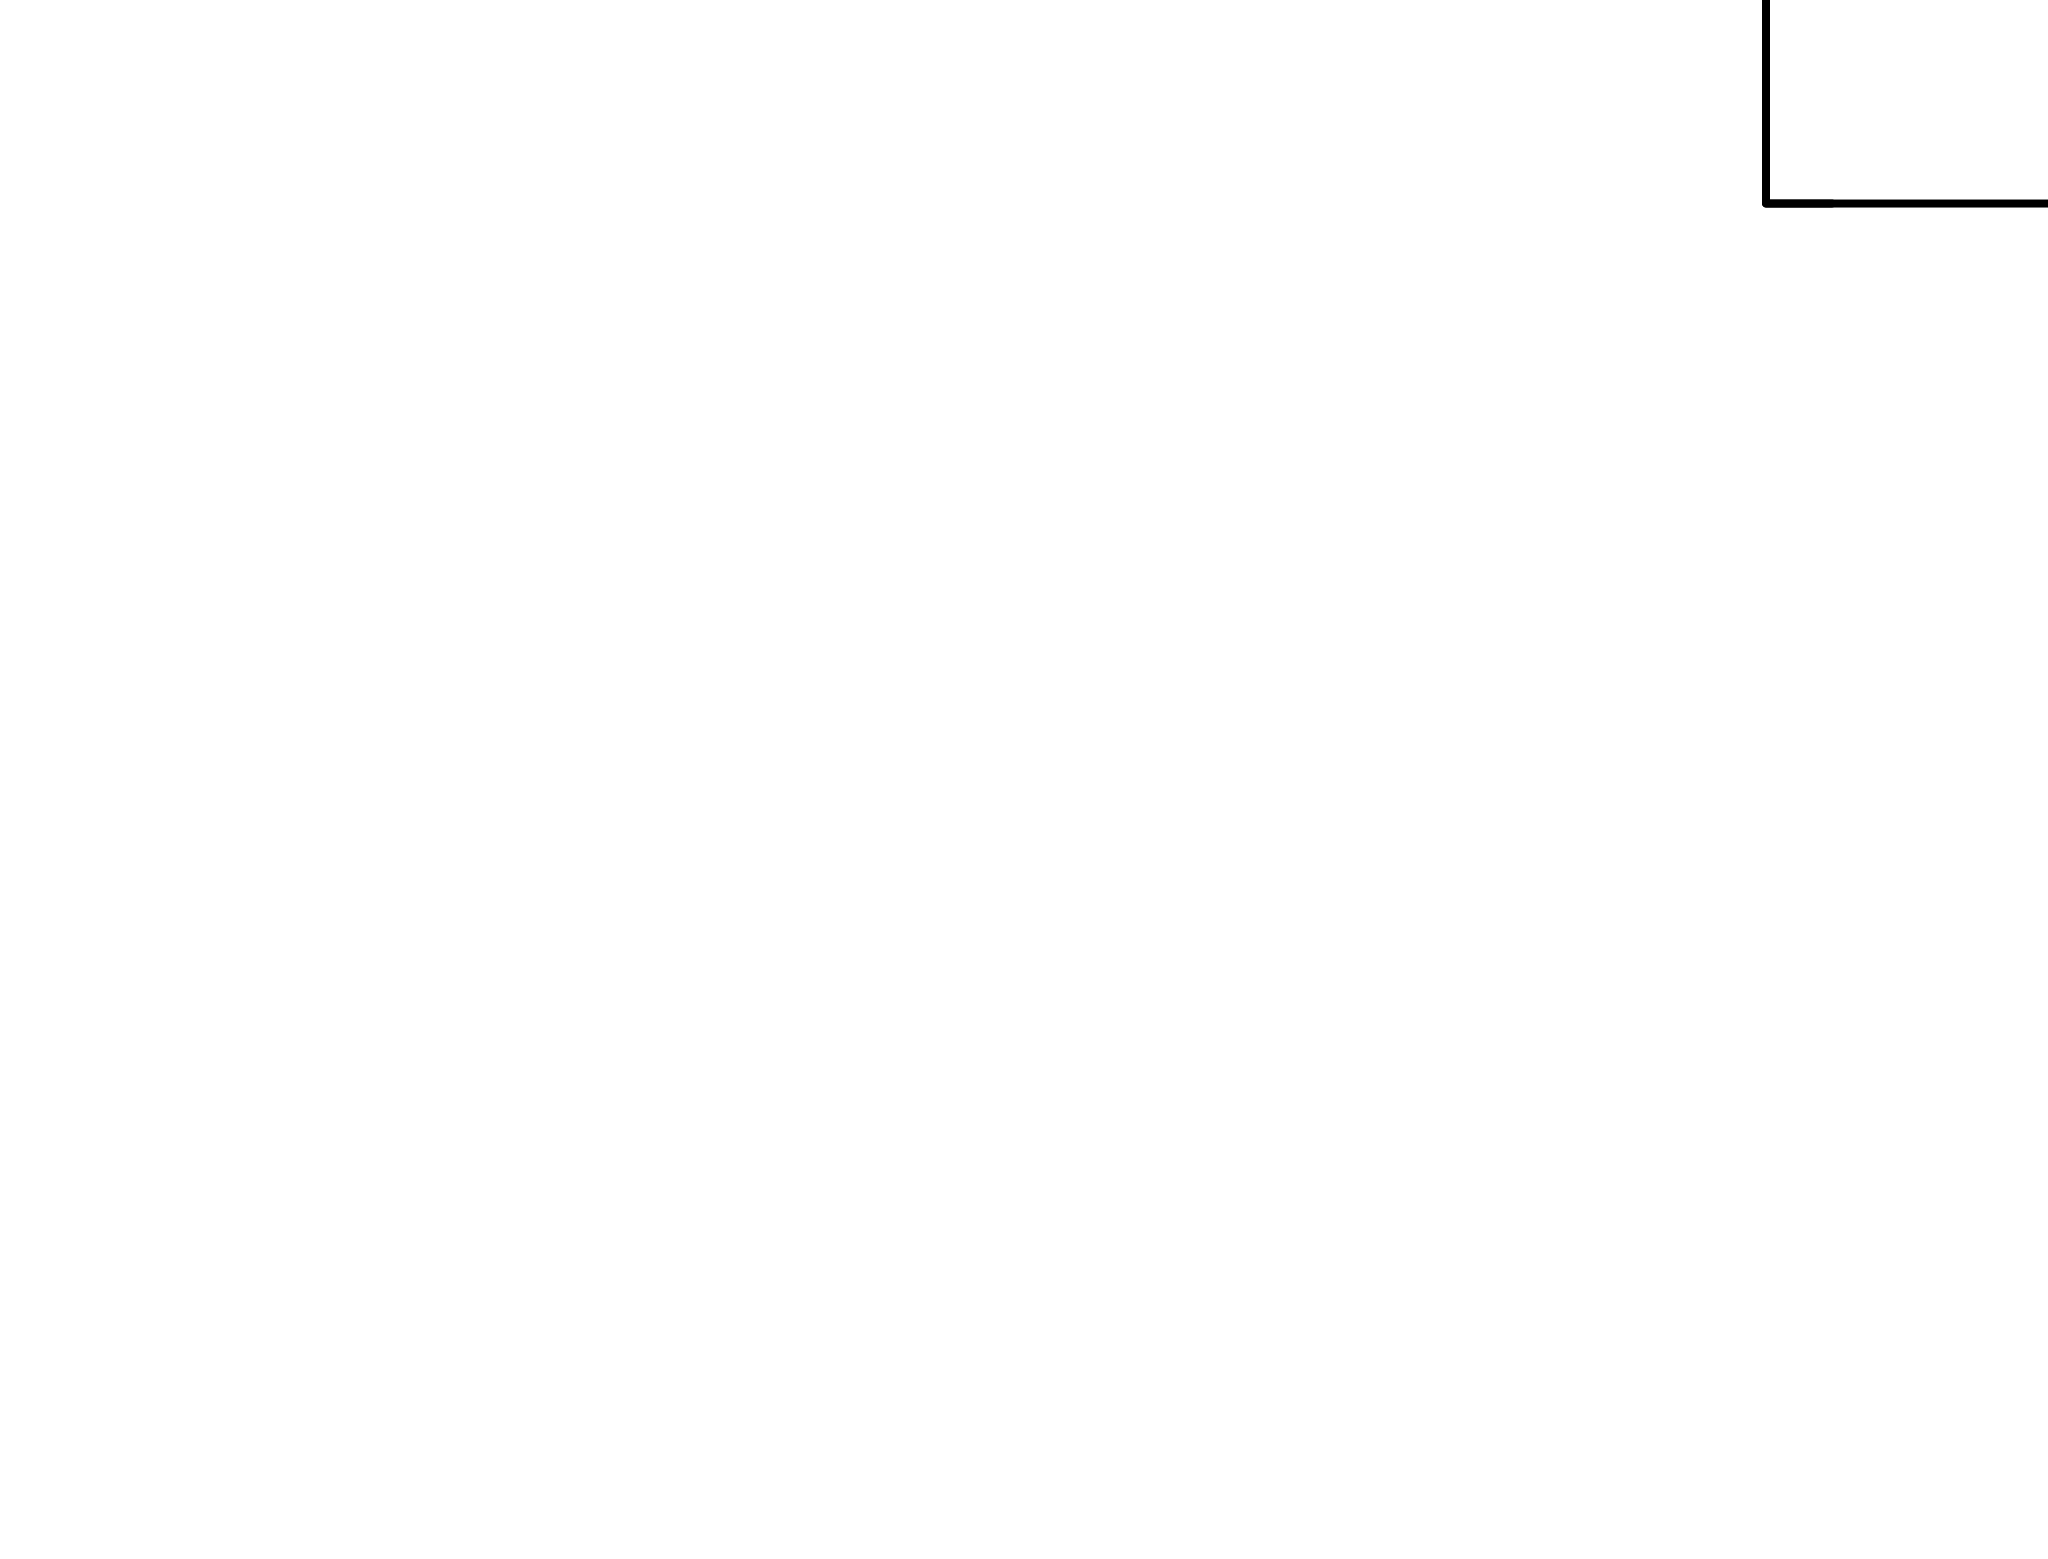

In [3]:
Plot.device ="/svg"
Plot.xAxis="keV"
Plot.xLog=True
Plot.yLog=True
Plot.addCommand("Rescale Y 0.00001 0.05")
Plot.addCommand("Rescale X 0.1 15")
Plot("data")
#spec.ignore("**-0.2 12.0-**")


Model TBabs<1>*bbody<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
________________________________________________________________________

tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE NOTICE:
To get the model described by the above paper
you will also have to set the abundances:
   abund wilm

Note that this routine ignores the current cross section setting
as it always HAS to use the Verner cross sections as a baseline.

Fit statistic  : C-Statistic              1.174242e+07     using 153 bins.

T

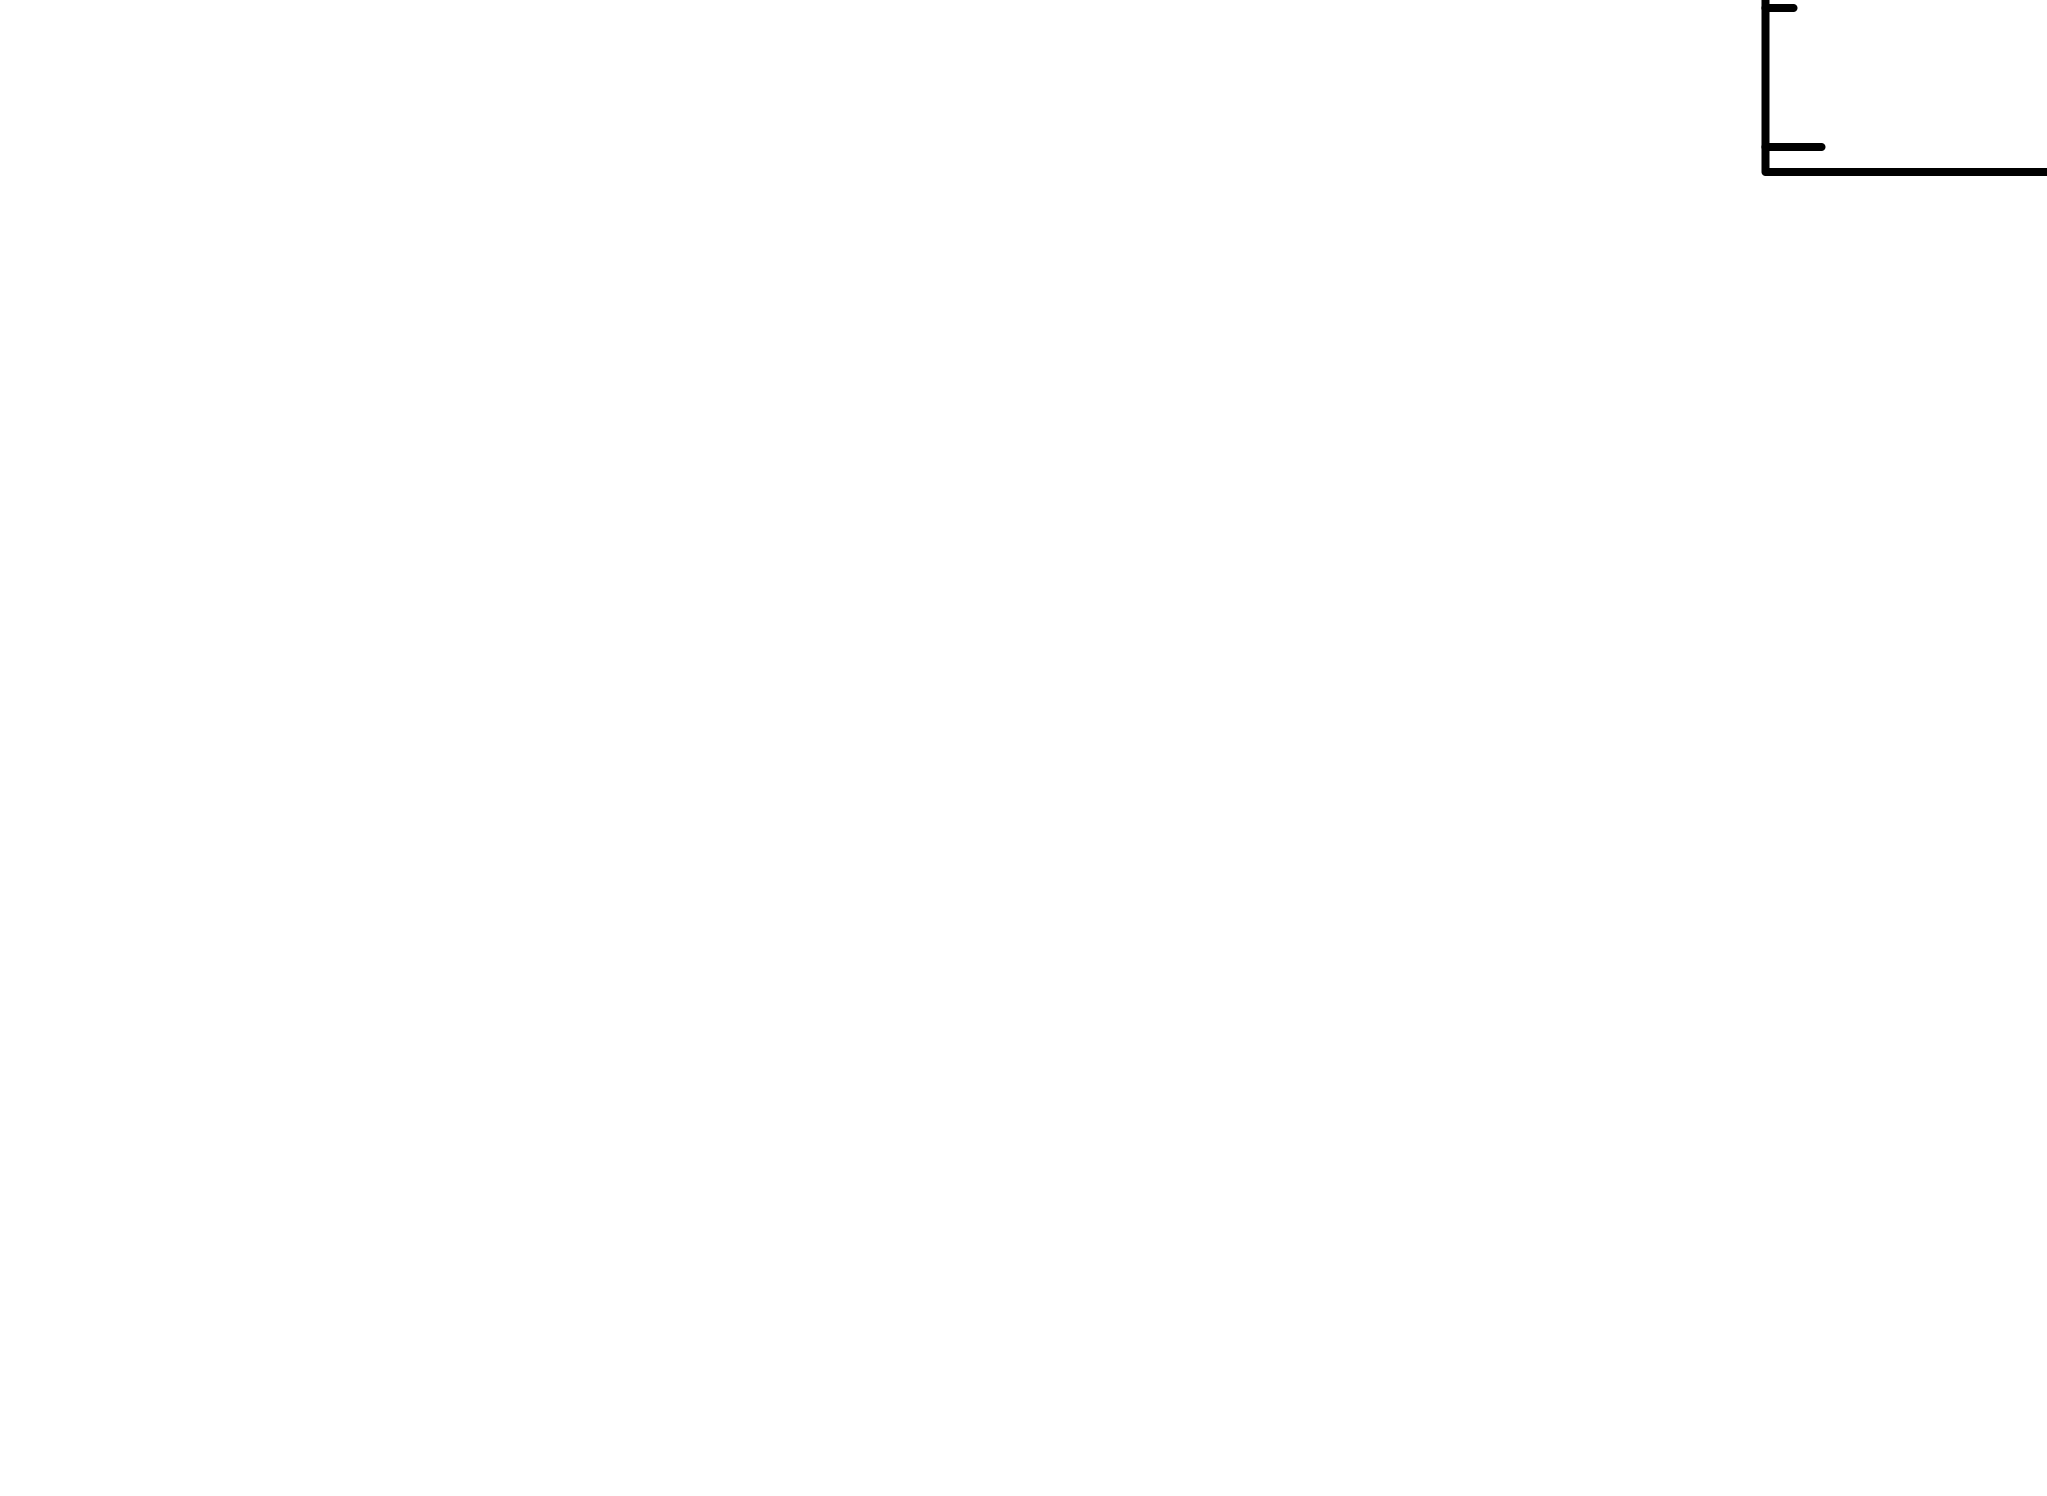

In [4]:
AllModels.clear()
mo1 = Model("tbabs*bbody")
Fit.perform()
Plot("data resid")


Model TBabs<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   3    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : C-Statistic              6.941801e+06     using 153 bins.

Test statistic : Chi-Squared              1.019650e+12     using 153 bins.

***Warning: Chi-square may not be valid due to bins with zero variance
            in spectrum number(s): 1 

 Null hypothesis probability of 0.000000e+00 with 150 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
C-Statistic  |beta|/N    Lvl          1:nH    2:PhoIndex        3:norm
1.70358e+06  1.74293e+06  -1      0.302185       5.98480      0.387866
170.485      1.84667e+06  

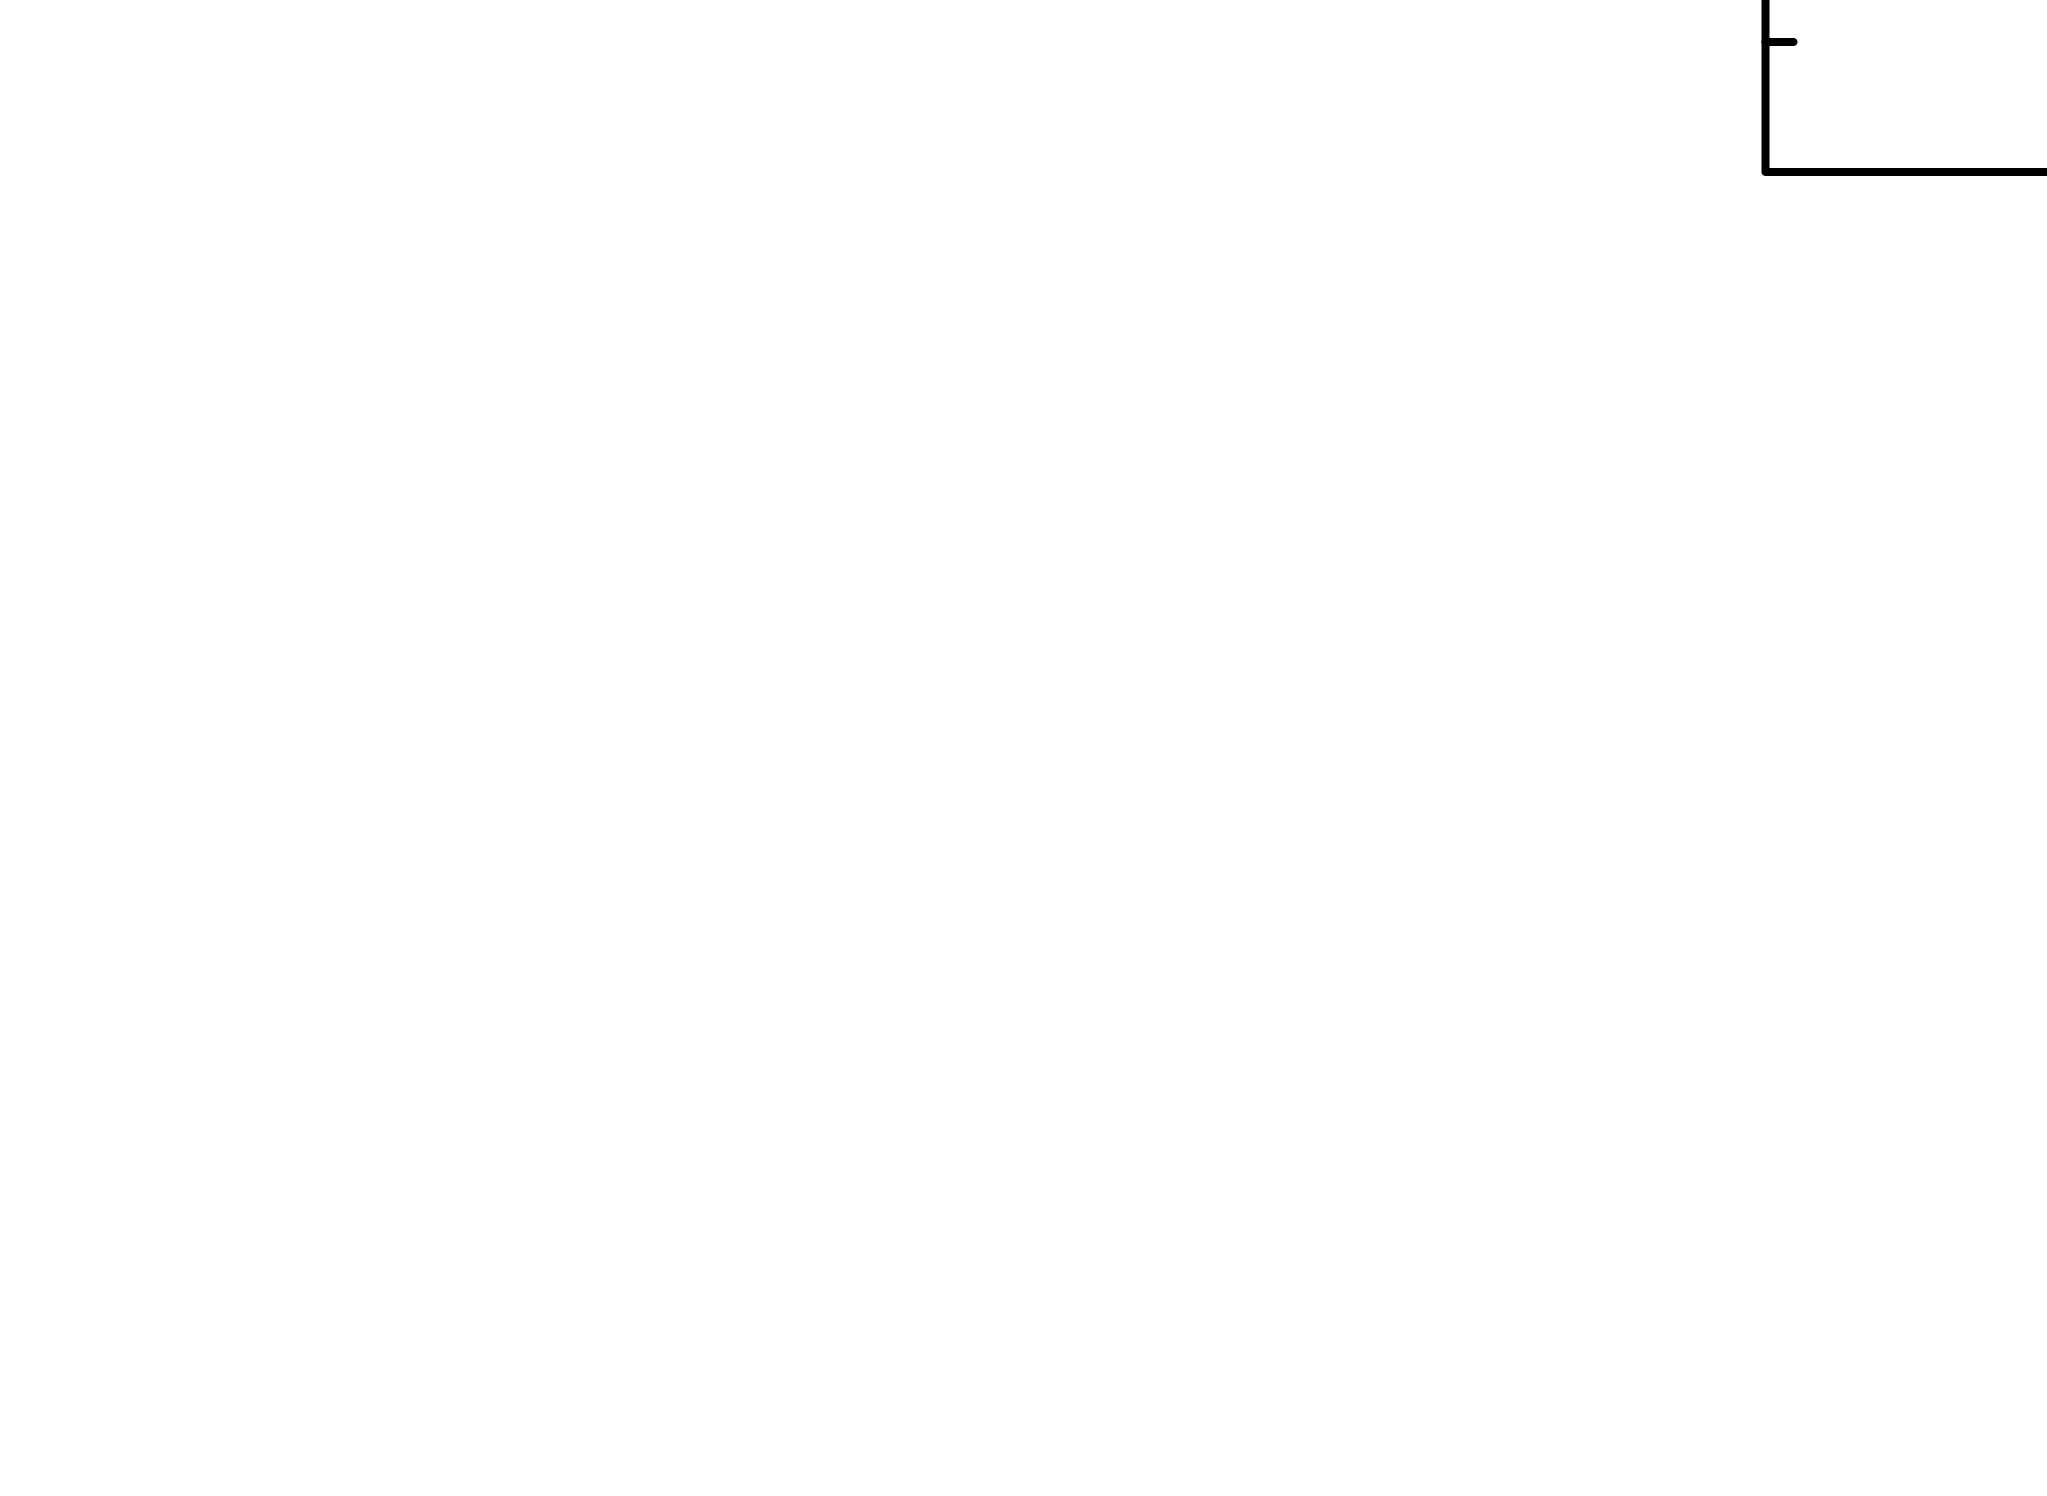

In [5]:
AllModels.clear()
mo = Model("tbabs*powerlaw")
Fit.perform()
Plot("data resid")

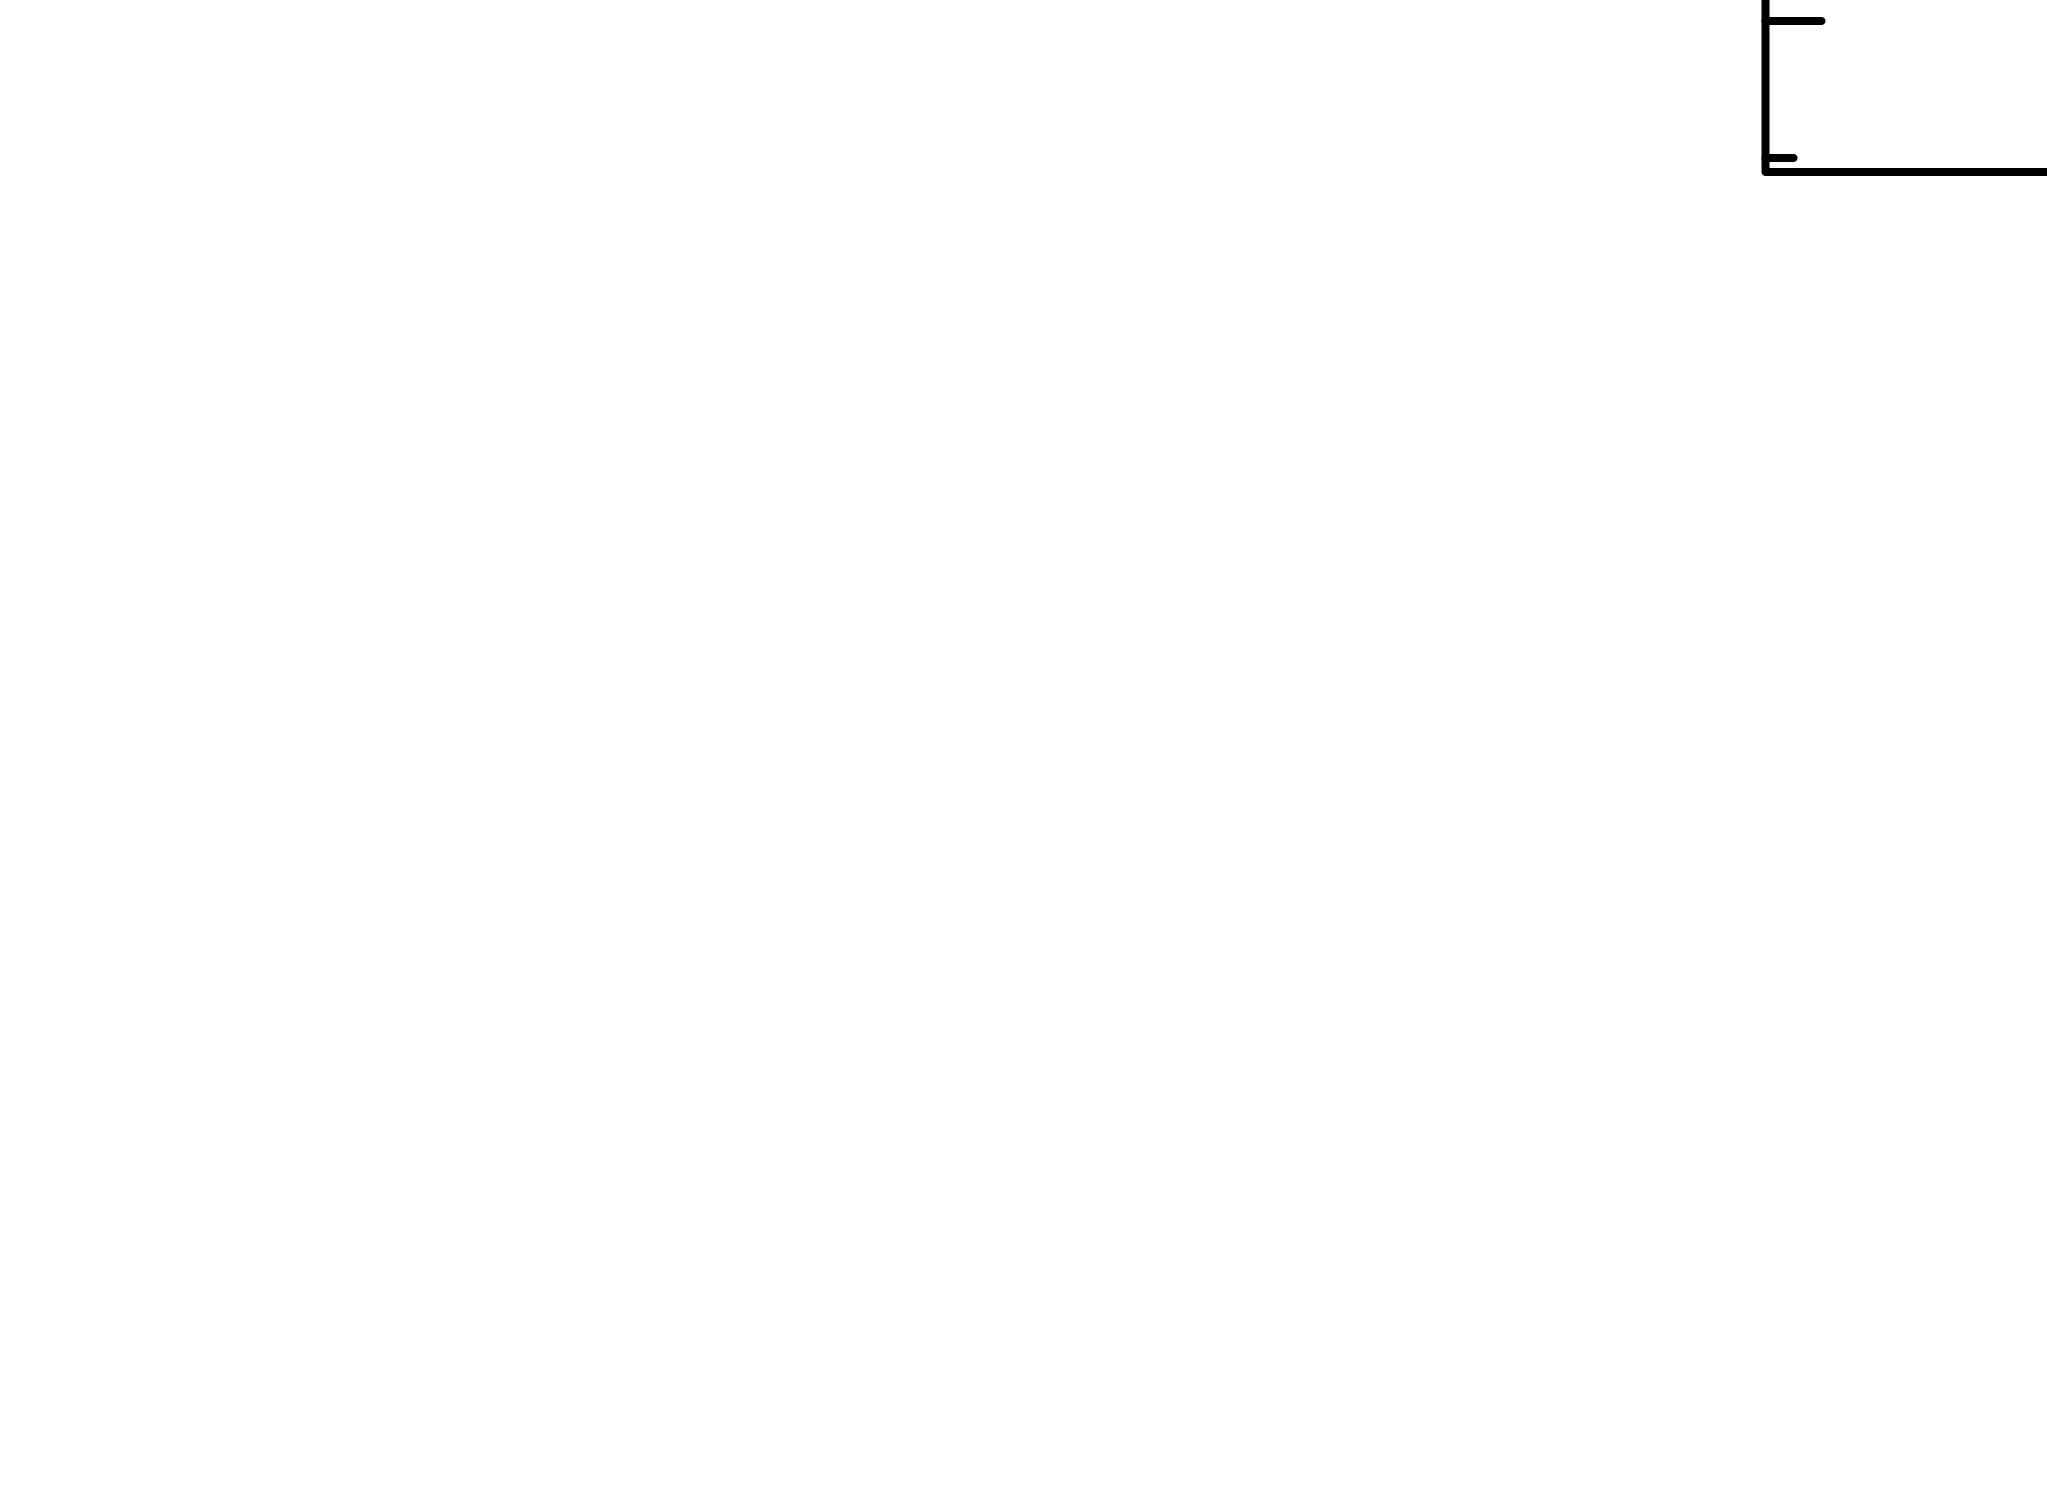


Model TBabs<1>*bremss<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : C-Statistic              2.893034e+06     using 153 bins.

Test statistic : Chi-Squared              2.075154e+11     using 153 bins.

***Warning: Chi-square may not be valid due to bins with zero variance
            in spectrum number(s): 1 

 Null hypothesis probability of 0.000000e+00 with 150 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
C-Statistic  |beta|/N    Lvl          1:nH          2:kT        3:norm
1.44615e+06  538898       -3     0.0742783       198.150      0.423957
4083.1       674779       -1

In [6]:
AllModels.clear()
mo = Model("tbabs*bremss")
Fit.perform()
Plot("data resid")


Model TBabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________

Reading APEC data from 3.0.9


Fit statistic  : C-Statistic              1.083299e+06     using 153 bins.

Test statistic : Chi-Squared              2.897853e+10     using 153 bins.

***Warning: Chi-square may not be valid due to bins with zero variance
            in spectrum number(s): 1 

 Null hypothesis probability of 0.000000e+00 with 150 degrees of freedom
 Current data and model not fit yet.

Fit statistic  : C-Statistic              1.054559e+06     us

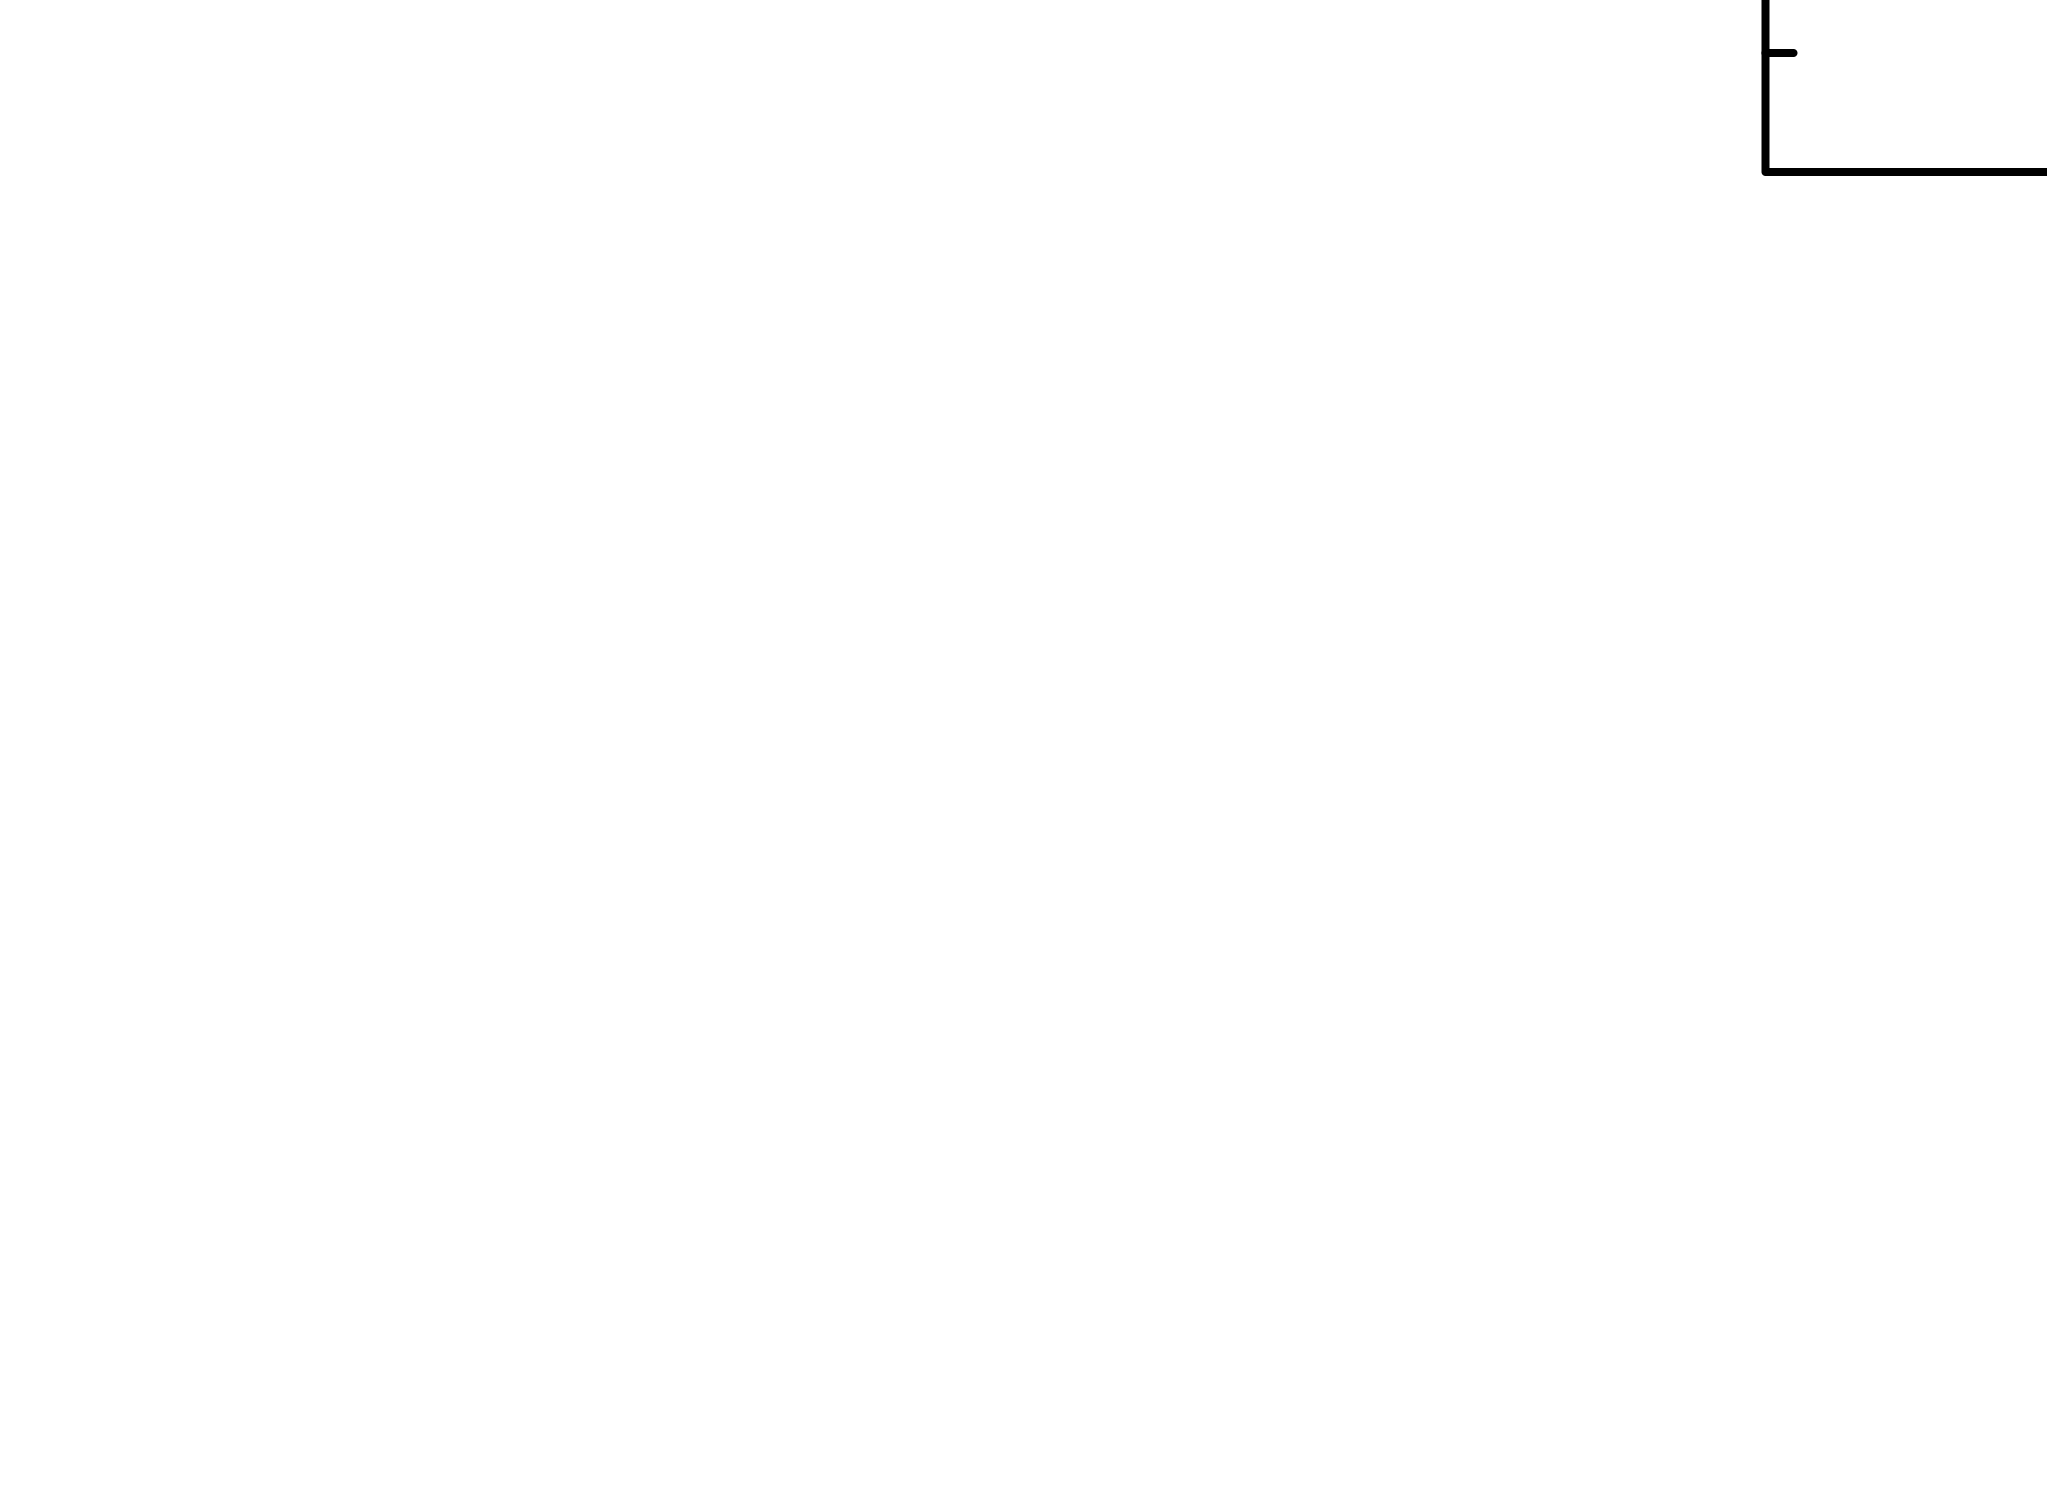

In [7]:
AllModels.clear()
mo = Model("tbabs*apec")
mo.apec.kT = 4.0
Fit.perform()
Plot("data resid")

In [8]:
AllModels.calcFlux(".2 12.0")

 Model Flux 3.9006e-05 photons (2.302e-13 ergs/cm^2/s) range (0.20000 - 12.000 keV)


In [9]:
plx = 0.2744
d_kpc = 1/plx
F_x = 1.6234*10**-13

L_x = 4*3.14*F_x*(d_kpc*3.086*10**21)**2
print(L_x)

2.5789255831167283e+32


In [10]:
import numpy as np
print(d_kpc)
print(np.log10(L_x))

3.644314868804665
32.411438810417096


In [11]:
F_opt = 1.05*10**-5 * 10**(-0.4*19.88)
print('Optical Flux: ',F_opt)
print('F_x / F_opt: ', np.log10(F_x/F_opt))

Optical Flux:  1.1727064101695894e-13
F_x / F_opt:  0.14123624256114856



Model TBabs<1>(bbody<2> + powerlaw<3>) Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
   4    3   powerlaw   PhoIndex            1.00000      +/-  0.0          
   5    3   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : C-Statistic              1.868593e+07     using 153 bins.

Test statistic : Chi-Squared              6.438373e+12     using 153 bins.

***Warning: Chi-square may not be valid due to bins with zero variance
            in spectrum number(s): 1 

 Null hypothesis probability of 0.000000e+00 with 148 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
C-Stat

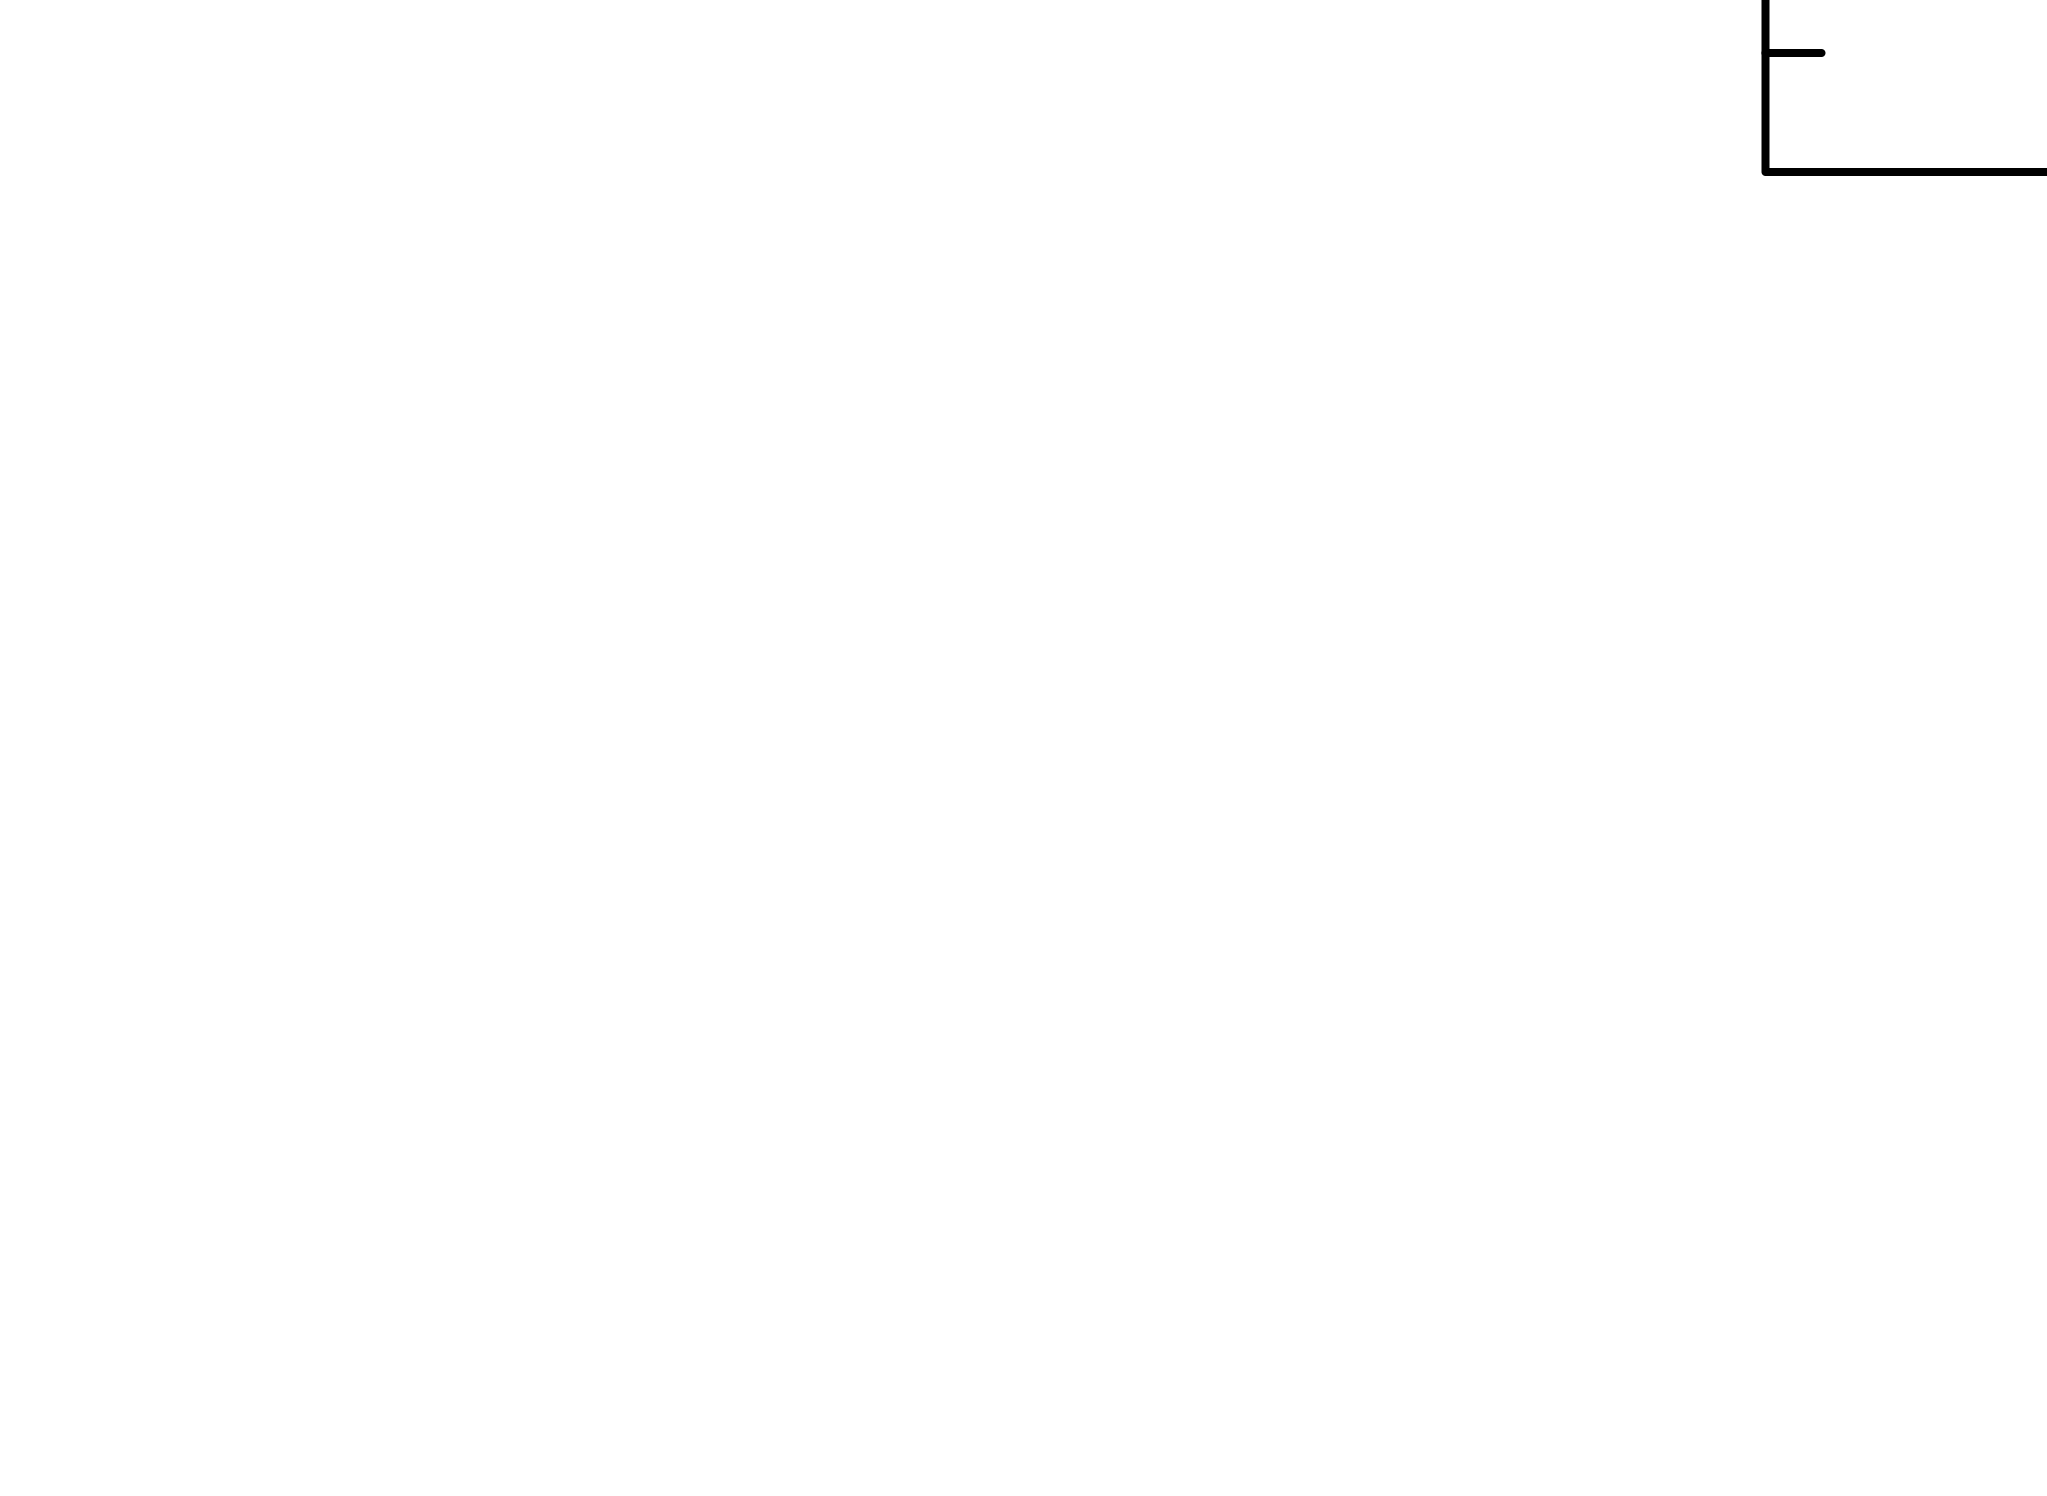

In [12]:
AllModels.clear()
mo = Model("tbabs*(bbody+powerlaw)")
Fit.perform()
Plot("data resid")